# Coinflips

*Coinflips until you die.*

Here are some things that I like:

1. Reminding myself that probability theory is rooted in sets. (Blitzstein & Hwang's "Introduction to Probability" does a great job driving this point home. I claim that applied probability curricula normally fail to do so -- a couple of Venn Diagrams is not enough.)
2. Indicator variables that convert set theory expressions into random variables (c.f. Matching Problem).
3. Indicator variables that convert expected value calculations to probabilities.
4. Independent events.

I claim:

- Problems typically become confusing when random variables have complicated interdependencies, but often they are made up of "atoms" of independent events. For difficult problems, deconstructing a problem in terms of independent events can be half the battle.
- Recursion. Typically emerges most naturally from applying the law of total expectation.
- Expected values for complicated problems are much simpler creatures than full probability distributions, and can often be found using symmetry tricks. This provides fertile ground for the type of dumb probability puzzles that quant interviewers apparently *salivate* over.


## Expected Flips until $n$ Heads in a Row: Recursion and Law of Total Expectation
A coin is flipped until there is a sequence of $n$ subsequent heads. What is the exected number of flips $\mathbb{E}[N]$? 

Condition on the outcome of the first flip:
\begin{equation}
\begin{array}{rl}
\mathbb{E}[N] &= \sum_{j=\{H,T\}}\mathbb{E}[N|f_1 = j]p(f_1=j)\\
&=\frac{1}{2}\underbrace{\mathbb{E}[N|f_1=T]}_{\mathbb{E}[N+1]=\mathbb{E}[N]+1} + \frac{1}{2}\mathbb{E}[N|f_1=H]
\end{array}
\end{equation}

If you the first flip is tails, you're back to where you started, except that you'e already done one flip. Hence $\mathbb{E}[N|f_1=T] = \mathbb{E}[N]+1$. If the first throw is heads, then we should find ourselves slightly closer to $k$ flips. Repeating the procedure by conditioning on the outcome of the second throw:

\begin{equation}
\begin{array}{rl}
\mathbb{E}[N|f_1=H] &= \sum_{j=\{H,T\}}\mathbb{E}[N|f_1 = H|f_2=j]p(f_2=j)\\
&=\frac{1}{2}\underbrace{\mathbb{E}[N|f_1=H,f_2=T]}_{\mathbb{E}[N+2]=\mathbb{E}[N]+2} + \frac{1}{2}\mathbb{E}[N|f_1=H,f_2=H]
\end{array}
\end{equation}

Unsurprisingly, this looks like a pattern where either you start over because you flipped tails, or you are dealing with the conditional probability of already having flipped some consecutive heads. Let $M_k = \mathbb{E}[N|f_1=H,f_2=H,...,f_k=H]$, so that $M_0 = \mathbb{E}[N]$ is the expected number of flips conditioned on no previous outcomes. Then:

\begin{equation}
M_k = \frac{1}{2}(k+1+M_0)+\frac{1}{2}M_{k+1}
\end{equation}

Cool. So far this is a linear system that goes on forever. Fortunately the agreement was that the game was going to be over if we throw $n$ heads in a row. That means that $\mathbb{E}[N|f_1=H,f_2=H,...,f_n=H] = M_n = n$ because here I am explicitly conditioning on throwing $n$ heads in a row. 


Take $n=3$, for example. Then:
\begin{equation}
\begin{array}{rl}
M_0 &= \frac{1}{2}(0+1+M_0)+\frac{1}{2}\underbrace{\left[\frac{1}{2}(1+1+M_0)+\frac{1}{2}\underbrace{\left[\frac{1}{2}(2+1+M_0)+\frac{1}{2}\underbrace{\left[n\right]}_{M_3}\right]}_{M_2}\right]}_{M_1}\\
&=\sum^{n-1}_{k=0}\frac{1}{2^{k+1}}(1+k+M_0) + \frac{1}{2^n}n\\
M_0\left[1-\sum_{k=0}^{n-1} \frac{1}{2^{k+1}}\right]&=\sum^{n-1}_{k=0}\frac{1+k}{2^{k+1}} + \frac{1}{2^n}n\\
M_0 &= \left[\sum^{n-1}_{k=0}\frac{1+k}{2^{k+1}} + \frac{1}{2^n}n\right]\left[1-\sum_{k=0}^{n-1} \frac{1}{2^{k+1}}\right]^{-1}
\end{array}
\end{equation}

To the dismay of my friends and family, I will not simplify this further. (Even though it is easily possible using the finite geometric series)

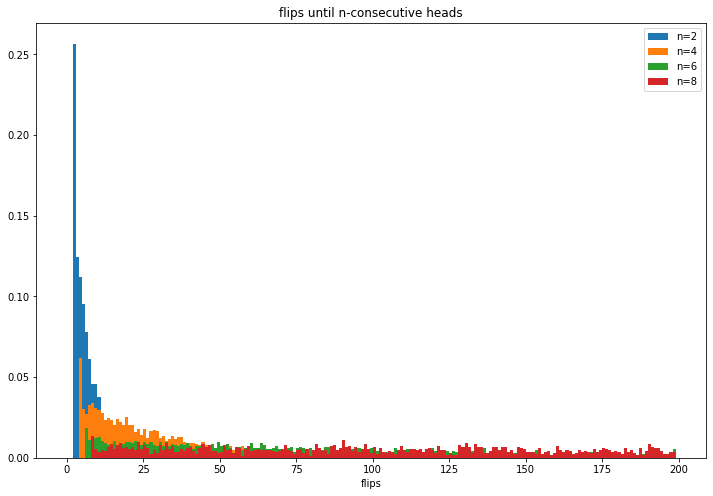

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def M_0(n):
    """
    Expected number of flips until there are n consecutive heads
    """
    numerator = np.sum([(1+k)/2**(k+1) for k in range(n)])+n/2**n
    denominator = 1-np.sum([1/2**(k+1) for k in range(n)])
    
    return numerator/denominator


def get_sequence(n):
    """
    generates a sequence of flips and stops the moment there are n consecutive heads, then returns the length of the sequence.
    might run for a long time.
    """
    sq = ''
    while sq[-n:] != n*'H':
        sq+=np.random.choice(['H','T'])
    return len(sq)
    
def M_0_simulated(n,n_trials=100):
    return np.mean([get_sequence(n) for i in range(n_trials)])

# look at distribution, because it's interesting
plt.figure(figsize=(12,8))
nn = [2,4,6,8]
for n in nn:
    data = [get_sequence(n) for i in range(5000)]
    _ = plt.hist(data,bins=list(range(200)),density=True)
    
plt.legend(['n=%i' % i for i in nn])
plt.xlabel('flips')
_ = plt.title('flips until n-consecutive heads')

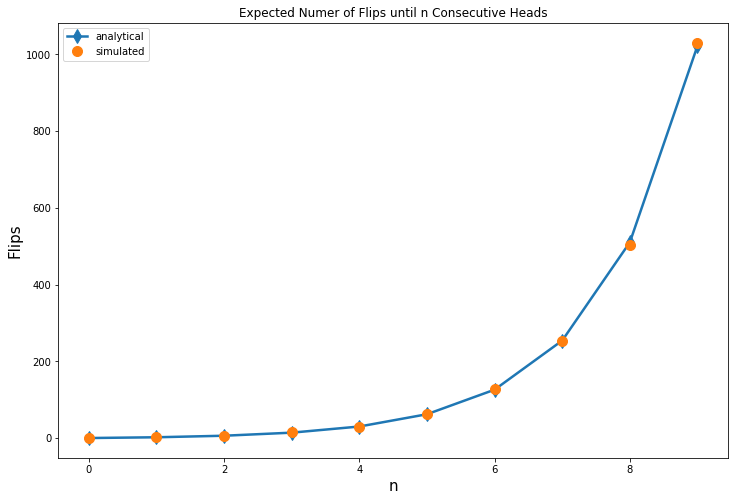

In [14]:
nn = list(range(10))

plt.figure(figsize=(12,8))
plt.plot(nn,[M_0(n) for n in nn],'d-',linewidth=2.5,markersize=10)
plt.plot(nn,[M_0_simulated(n,n_trials=1000) for n in nn],'o',linewidth=2.5,markersize=10)

plt.legend(['analytical','simulated'])
plt.title('Expected Numer of Flips until n Consecutive Heads')
plt.xlabel('n',fontsize=15)
_= plt.ylabel('Flips',fontsize=15)

## Why This Doesn't Generalize To Arbitrary Sequences

So what if instead of looking for a sequence of $n$ heads, I am looking for some arbitrary $n$-flip sequence, such as "HHTHHH" or whatever. 

The formula does not work anymore, because it assumed that you start over the moment that you flip tails. For an arbirary sequence, flipping the wrong thing does not necessarily mean that you start over. 

Let's say $S=\{s_1=H,s_2=H,s_3=T,s_4=H,s_5=H,s_6=H\}$. 

*Previously*, for a sequence of all heads: 

\begin{equation}
\mathbb{E}[N|f_1=H,...,f_k\neq H] = \mathbb{E}[N]
\end{equation}.

Now, 

\begin{equation}
\mathbb{E}[N|f_1=s_1,f_2=s_2,f_3=s_3,f_4=s_4,f_5=s_5,f_6\neq s_6] = \mathbb{E}[N|f_1=s_1,f_2=s_2,f_3=s_3]
\end{equation}. 

If you get only the last flip of the sequence wrong, then it puts you back to where you had the first three flips of the sequence right. Because of this, the expected number of flips until you see some sequence S is smaller.

Even though the result doesn't generalize, it is interesting because it provides an upper bound on the expected value. Any repeat of the first few items within the sequence at some point during the sequence will lower the expected number of flips.

An approach toward studying this might be by modeling the process as a Markov Chain. If $S$ has length $n$, then let the state space be all possible sequences of length $n$. Then the transition matrix acts in a way so the states are modified corresponding to dropping the first entry and tagging on a "T" or an "H" with equation probability. I.e., state "THH" --> "HHH" with p=0.5 and "THH" --> "HHT" with p=0.5. This is except for the state that corresponds to the sought after Sequence, $S$, which is absorbing. Denote the set of states where the last $r$ entries are equal to the first $k$ elements of $S$ as $\{x_r\}$ (these have size $2^{n-r}$ because you can assign $n-r$ arbitrarily and $r$ must match up with S). When $S$ consists of only heads, then the states $\{x_r\}$ only communiate with $\{x_0\}$ or $\{x_{r+1}\}$. For arbitrary sequences, you will see communication of the form $\{x_r\} \rightarrow \{x_{r-m}\}$. A setback, but not all the way to 0.

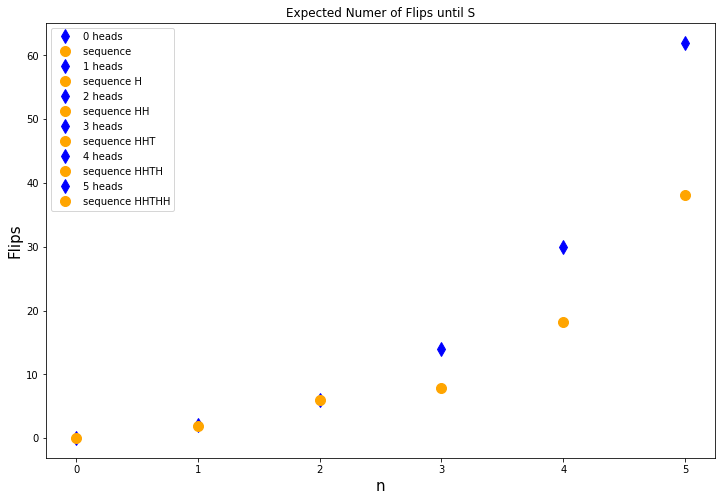

In [53]:
def get_sequence_S(S):
    """
    generates a sequence of flips and stops the moment that sequence S is flipped.
    """
    sq = ''
    while sq[-len(S):] != S:
        sq+=np.random.choice(['H','T'])
    return len(sq)
    
def M_0_simulated_S(S,n_trials=100):
    return np.mean([get_sequence_S(S) for i in range(n_trials)])


SS = 'HHTHHH'
nn = list(range(len(SS)))

plt.figure(figsize=(12,8))
for n in nn:
    S = SS[:n]
    
    plt.plot(n,M_0(n),'d',color='blue',markersize=10)
    plt.plot(n,M_0_simulated_S(S,n_trials=1000),'o',color='orange',markersize=10)
    

plt.legend(np.hstack([['%i heads' % n,'sequence %s' % S[:n]] for n in nn]))
plt.title('Expected Numer of Flips until S')
plt.xlabel('n',fontsize=15)
_= plt.ylabel('Flips',fontsize=15)